# FAA wildlife strike

In [1]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# set display options
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
data_path = 'data/'

In [2]:
# load data, 
df = pd.read_excel(data_path + 'Public.xlsx')

In [3]:
col_name = pd.read_csv(data_path + 'read_me.csv')
# make it a dictionary for easy access
col_name_dict = col_name.set_index('Column Name')['Explanation of Column Name and Codes'].to_dict()
col_name_dict

{nan: nan,
 'INDEX NR': 'Individual record number',
 'OPID': 'Airline operator code',
 'OPERATOR': 'A three letter International Civil Aviation Organization code for aircraft operators. (BUS = business, PVT = private aircraft other than business, GOV = government aircraft, MIL - military aircraft.)',
 'ATYPE': 'Aircraft',
 'AMA': 'International Civil Aviation Organization code for Aircraft Make',
 'AMO': 'International Civil Aviation Organization code for Aircraft Model ',
 'EMA': 'Engine Make Code (see Engine Codes tab below)',
 'EMO': 'Engine Model Code (see Engine Codes tab below)',
 'AC_CLASS': 'Type of aircraft (see Aircraft Type tab below)',
 'AC_MASS': '1 = 2,250 kg or less: 2 = ,2251-5700 kg: 3 = 5,701-27,000 kg: 4 = 27,001-272,000 kg: 5 = above 272,000 kg',
 'NUM_ENGS': 'Number of engines',
 'TYPE_ENG': 'Type of power A = reciprocating engine (piston): B = Turbojet: C = Turboprop: D = Turbofan: E = None (glider): F = Turboshaft (helicopter): Y = Other',
 'ENG_1_POS': 'Where en

In [4]:
print("shape of the data: ", df.shape)

shape of the data:  (316483, 101)


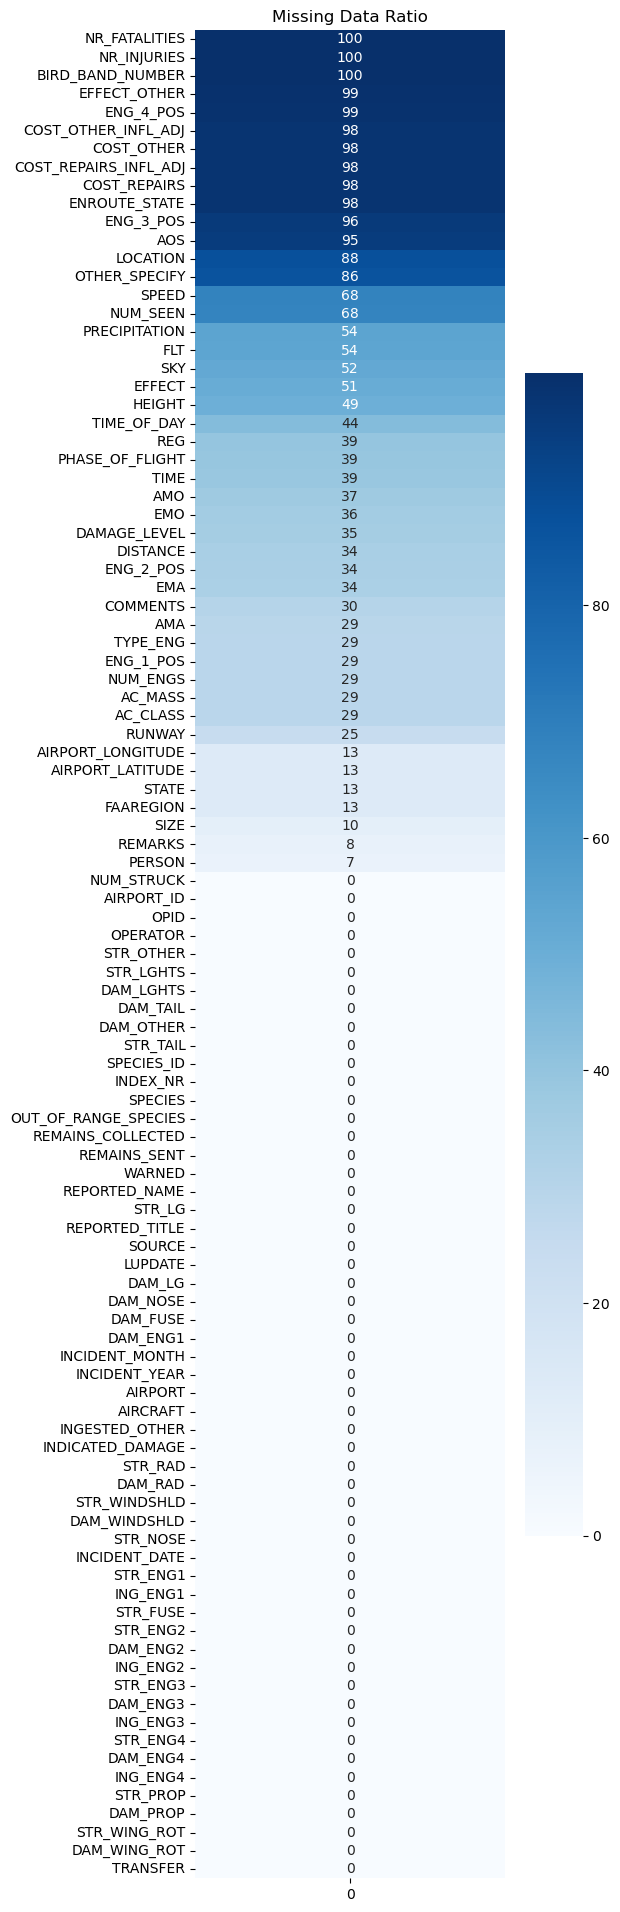

In [5]:
# plot the missing ratio of each column 
plt.figure(figsize=(5,24))
missing_data = (df.isnull().mean()*100).sort_values(ascending=False)
sns.heatmap(missing_data.to_frame(), cmap='Blues', annot=True, fmt='.0f')
plt.title('Missing Data Ratio')
plt.show()


In [6]:
# show missing data ratio, by column names, omit the columns with no missing data
missing_data

NR_FATALITIES            99.992101
NR_INJURIES              99.907420
BIRD_BAND_NUMBER         99.763652
EFFECT_OTHER             99.240402
ENG_4_POS                98.890620
COST_OTHER_INFL_ADJ      98.377164
COST_OTHER               98.377164
COST_REPAIRS_INFL_ADJ    98.343671
COST_REPAIRS             98.343671
ENROUTE_STATE            98.246351
ENG_3_POS                95.750799
AOS                      95.029117
LOCATION                 87.600598
OTHER_SPECIFY            86.475419
SPEED                    68.297191
NUM_SEEN                 67.588148
PRECIPITATION            54.475596
FLT                      53.909373
SKY                      52.394283
EFFECT                   50.969562
HEIGHT                   49.476907
TIME_OF_DAY              43.770755
REG                      39.476370
PHASE_OF_FLIGHT          39.110474
TIME                     38.692126
AMO                      37.129956
EMO                      36.207000
DAMAGE_LEVEL             35.379783
DISTANCE            

In [7]:
# show cols with more than 50% missing values
high_missing_cols = missing_data[missing_data > 50].index
# show the col names and the explanation from the dictionary
for col in high_missing_cols:
    if col in col_name_dict:
        print(col, ":", col_name_dict[col])
    else:
        print(col, ":","Explanation not found in dictionary")

NR_FATALITIES : Number of human fatalities
NR_INJURIES : Number of people injured
BIRD_BAND_NUMBER : Bird Band Number associated with the wildlife struck
EFFECT_OTHER : Effect on flight other than those listed on the form
ENG_4_POS : Where engine # 4 is mounted  on aircraft (see Engine Position tab below)
COST_OTHER_INFL_ADJ : Costs adjusted to the most recent year based on Consumer Price Index, U.S. Department of Labor.  Inflation-adjusted costs are updated annually.
COST_OTHER : Estimated other costs, other than those in previous field in dollars (USD). May include loss of revenue, hotel expenses due to flight cancellation, costs of fuel dumped, etc.
COST_REPAIRS_INFL_ADJ : Costs adjusted to the most recent year based on Consumer Price Index, U.S. Department of Labor.  Inflation-adjusted costs are updated annually.
COST_REPAIRS : Estimated cost of repairs of replacement in dollars (USD)
ENROUTE_STATE : Explanation not found in dictionary
ENG_3_POS : Where engine # 3 is mounted  on ai

In [8]:
# drop off the columns with more than 50% missing values
df_less_missing = df.drop(columns=high_missing_cols).copy()

In [9]:
df_less_missing.tail(20)

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,AIRPORT_LATITUDE,AIRPORT_LONGITUDE,RUNWAY,STATE,FAAREGION,OPID,OPERATOR,REG,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,PHASE_OF_FLIGHT,HEIGHT,DISTANCE,INGESTED_OTHER,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,SPECIES_ID,SPECIES,OUT_OF_RANGE_SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_STRUCK,SIZE,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
316463,1620487,2024-09-10,9,2024,,NaN,ZZZZ,UNKNOWN,NaN,NaN,NaN,NaN,NaN,UAL,UNITED AIRLINES,N66893,B-737-900,148,48,10.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,NaN,0,0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,ZL005,Red-eyed vireo,0,0010L: EWR 98 advised of strike at Gate C110. ...,1,1,Unknown,1,Small,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,2025-03-27,0
316464,1620488,2024-09-10,9,2024,,NaN,MMUN,CANCUN INTL,21.036528,-86.877083,NaN,FN,FGN,UAL,UNITED AIRLINES,N66893,B-737-900,148,48,10.0,1.0,A,4.0,D,2.0,1.0,1.0,Departure,NaN,NaN,0,1,M?,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,K3318,Short-tailed hawk,1,0010L: EWR 98 advised of strike at Gate C110. ...,1,1,Yes,1,Medium,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,2025-03-27,0
316465,1620489,2024-08-10,8,2024,09:48,NaN,KFLL,FORT LAUDERDALE/HOLLYWOOD INTL,26.07258,-80.15275,10L,FL,ASO,DAL,DELTA AIR LINES,N382DN,A-321,04A,7,10.0,1.0,A,4.0,D,2.0,1.0,1.0,Approach,NaN,0.0,0,0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,UNKB,Unknown bird,0,DAL655 reported striking a bird at the approac...,0,0,Unknown,1,NaN,NaN,REDACTED,REDACTED,MOR,Tower,2025-03-27,0
316466,1620490,2024-08-10,8,2024,11:44,NaN,KLSE,LA CROSSE MUNICIPAL AIRPORT,43.87938,-91.25654,36,WI,AGL,ENY,ENVOY AIR,N764JD,EMB-170,332,NaN,22.0,4.0,A,4.0,D,2.0,1.0,1.0,Approach,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,UNKB,Unknown bird,0,ENY4137 REPORTED BIRDSTRIKE UPON LANDING RWY 3...,0,0,Unknown,1,NaN,NaN,REDACTED,REDACTED,MOR,Tower,2025-03-27,0
316467,1620491,2024-11-13,11,2024,10:45,Day,KCLE,CLEVELAND-HOPKINS INTL ARPT,41.41089,-81.8494,6R,OH,AGL,RPA,REPUBLIC AIRLINES,N879RW,EMB-170,332,NaN,22.0,4.0,A,4.0,D,2.0,1.0,1.0,Landing Roll,0.0,0.0,0,0,N,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,YH004,Horned lark,0,ATCT relayed to Operations that RPA 5634 struc...,1,0,Yes,2-10,Small,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,2025-03-27,0
316468,1620492,2024-11-15,11,2024,15:56,Day,KDRO,DURANGO-LA PLATA COUNTY ARPT,37.15152,-107.75377,03/21,CO,ANM,SKW,SKYWEST AIRLINES,N506CA,CRJ100/200,188,10,22.0,4.0,A,3.0,D,2.0,5.0,5.0,Climb,10.0,0.0,0,1,M?,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,K3302,Red-tailed hawk,0,Aircraft received a gash in the skin where the...,1,0,No,1,Medium,*** Strike Report: 2024-11-15-181348-R0( Repor...,REDACTED,REDACTED,FAA Form 5200-7-E,Pilot,2025-03-27,0
316469,1620493,2024-08-10,8,2024,11:12,NaN,KHPN,WESTCHESTER COUNTY ARPT,41.06696,-73.70757,34,NY,AEA,BUS,BUSINESS,N816TW,PILATUS PC-12,726,8,31.0,4.0,A,2.0,C,1.0,7.0,NaN,Approach,NaN,NaN,0,0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,UNKB,Unknown bird,0,GPD816 REPORTED A BIRD STRIKE UPON LANDING RWY...,0,0,Unknown,1,NaN,NaN,REDACTED,REDACTED,MOR,Tower,2025-03-27,0
316470,1620494,2024-11-15,11,2024,17:45,Dusk,KTUL,TULSA INTL,36.19837,-95.88824,18L/36R,OK,ASW,JIA,PSA AIRLINES,N551NN,CRJ900,188,17,22.0,4.0,A,4.0,D,2.0,5.0,5.0,Approach,500.0,2.0,0,0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,UNKBS,Unknown bird - small,0,NaN,0,0,Yes,1,Small,NaN,REDACTED,REDACTE

In [10]:
# show the description of the columns
df_less_missing.describe()

,INDEX_NR,INCIDENT_MONTH,INCIDENT_YEAR,EMA,EMO,AC_MASS,NUM_ENGS,ENG_1_POS,ENG_2_POS,HEIGHT,DISTANCE,INGESTED_OTHER,INDICATED_DAMAGE,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OUT_OF_RANGE_SPECIES,REMAINS_COLLECTED,REMAINS_SENT,TRANSFER
count,3.164830e+05,316483.000000,316483.000000,210393.000000,201894.000000,226120.000000,225857.000000,225833.000000,210070.000000,159897.000000,207803.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.000000,316483.0
mean,9.671110e+05,7.221118,2012.748362,19.527213,8.311272,3.549164,2.009099,2.765322,2.595935,875.209460,0.853637,0.035793,0.065605,0.089847,0.006642,0.119769,0.004616,0.115358,0.005530,0.046053,0.009694,0.004206,0.039358,0.008184,0.004316,0.001564,0.000528,0.000057,0.000755,0.000215,0.000009,0.016032,0.002221,0.120013,0.019748,0.087863,0.003798,0.041847,0.004120,0.010061,0.003286,0.004819,0.003232,0.134544,0.007681,0.000509,0.532196,0.172616,0.0
std,3.371839e+05,2.752761,8.742391,10.634096,11.602185,0.866194,0.414831,2.117554,1.969322,1850.048523,3.642867,0.185775,0.247591,0.285963,0.081226,0.324692,0.067787,0.319455,0.074155,0.209600,0.097980,0.064714,0.194445,0.090093,0.065556,0.039517,0.022965,0.007541,0.027470,0.014657,0.003079,0.125600,0.047078,0.324977,0.139134,0.283095,0.061511,0.200241,0.064057,0.099797,0.057230,0.069249,0.056762,0.341237,0.087306,0.022549,0.498963,0.377915,0.0
min,6.082420e+05,1.000000,1990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,6.977895e+05,5.000000,2007.000000,10.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,7.844910e+05,8.000000,2015.000000,22.000000,4.000000,4.000000,2.000000,1.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,1.304768e+06,9.000000,2020.000000,31.000000,10.000000,4.000000,2.000000,5.000000,5.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,1.620509e+06,12.000000,2025.000000,47.000000,97.000000,5.000000,4.000000,7.000000,7.000000,32000.000000,99.000000,1.0000

In [11]:
# show the unique values numbers of the categorical columns
df_less_missing.select_dtypes(include='object').nunique()

INCIDENT_DATE         12707
TIME                   1441
TIME_OF_DAY               4
AIRPORT_ID             2697
AIRPORT                2704
AIRPORT_LATITUDE       2687
AIRPORT_LONGITUDE      2688
RUNWAY                 1327
STATE                    67
FAAREGION                10
OPID                    622
OPERATOR                618
REG                   44616
AIRCRAFT                612
AMA                      94
AMO                      63
AC_CLASS                  5
TYPE_ENG                  7
PHASE_OF_FLIGHT          12
DAMAGE_LEVEL              5
SPECIES_ID              931
SPECIES                 931
REMARKS              265265
WARNED                    3
NUM_STRUCK                4
SIZE                      3
COMMENTS             207231
REPORTED_NAME             1
REPORTED_TITLE            1
SOURCE                   16
PERSON                    6
LUPDATE                4511
dtype: int64

In [12]:
# we can drop non-informative columns, REPORTED_NAME, REPORTED_TITLE as only one unique value
# drop uninformative columns, LUPDATE, TRANSFER
df_less_missing.drop(columns=['REPORTED_NAME', 'REPORTED_TITLE', 'LUPDATE', 'TRANSFER'], inplace=True)


In [13]:
# for the damage level, if NA, fill with "missing"
df_less_missing['DAMAGE_LEVEL'].fillna('missing', inplace=True)
# let check the DAMAGE_LEVEL and INDICATED_DAMAGE, show the cross tabulation
pd.crosstab(df_less_missing['DAMAGE_LEVEL'], df_less_missing['INDICATED_DAMAGE'])


INDICATED_DAMAGE,0,1
DAMAGE_LEVEL,,
D,0,88
M,0,8672
M?,0,7665
N,183751,1
S,0,4335
missing,111969,2


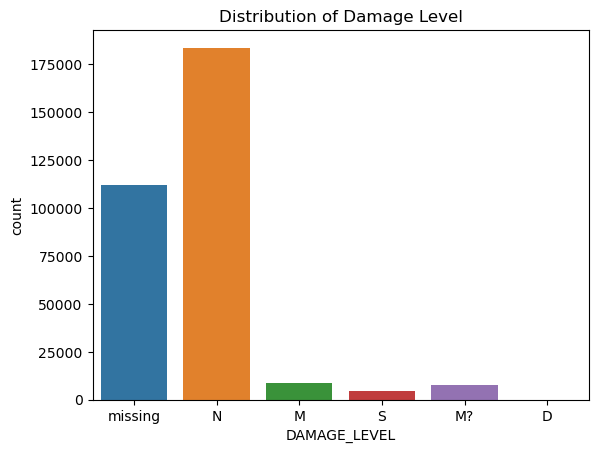

In [14]:
# plot the distribution of the damage level
sns.countplot(x='DAMAGE_LEVEL', data=df_less_missing)
plt.title('Distribution of Damage Level')
plt.show()


In [15]:
# re-group the damage level as 'Severe' and 'Not Severe'
# check the remarker of the record, the missing values are belong to 'Not Severe' group
df_less_missing['SEVERITY'] = df_less_missing['DAMAGE_LEVEL'].apply(lambda x: 1 if x in ['S', 'D'] else 0)


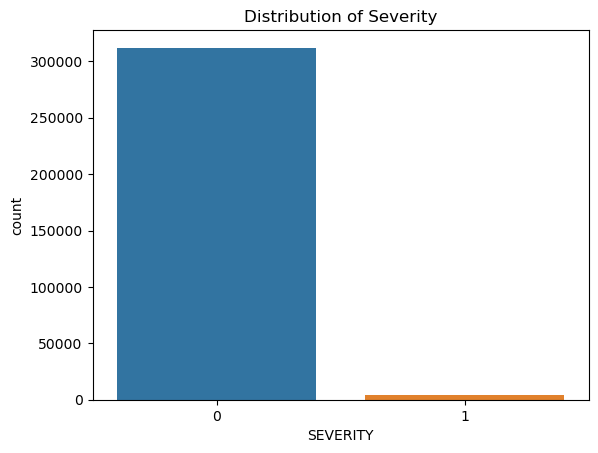

In [16]:
# plot the distribution of the SEVERITY
sns.countplot(x='SEVERITY', data=df_less_missing)
plt.title('Distribution of Severity')
plt.show()

/var/folders/60/j13rv8sj6h7_s2bchmfjrwbm0000gn/T/ipykernel_47700/2061258173.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_less_missing.corr()


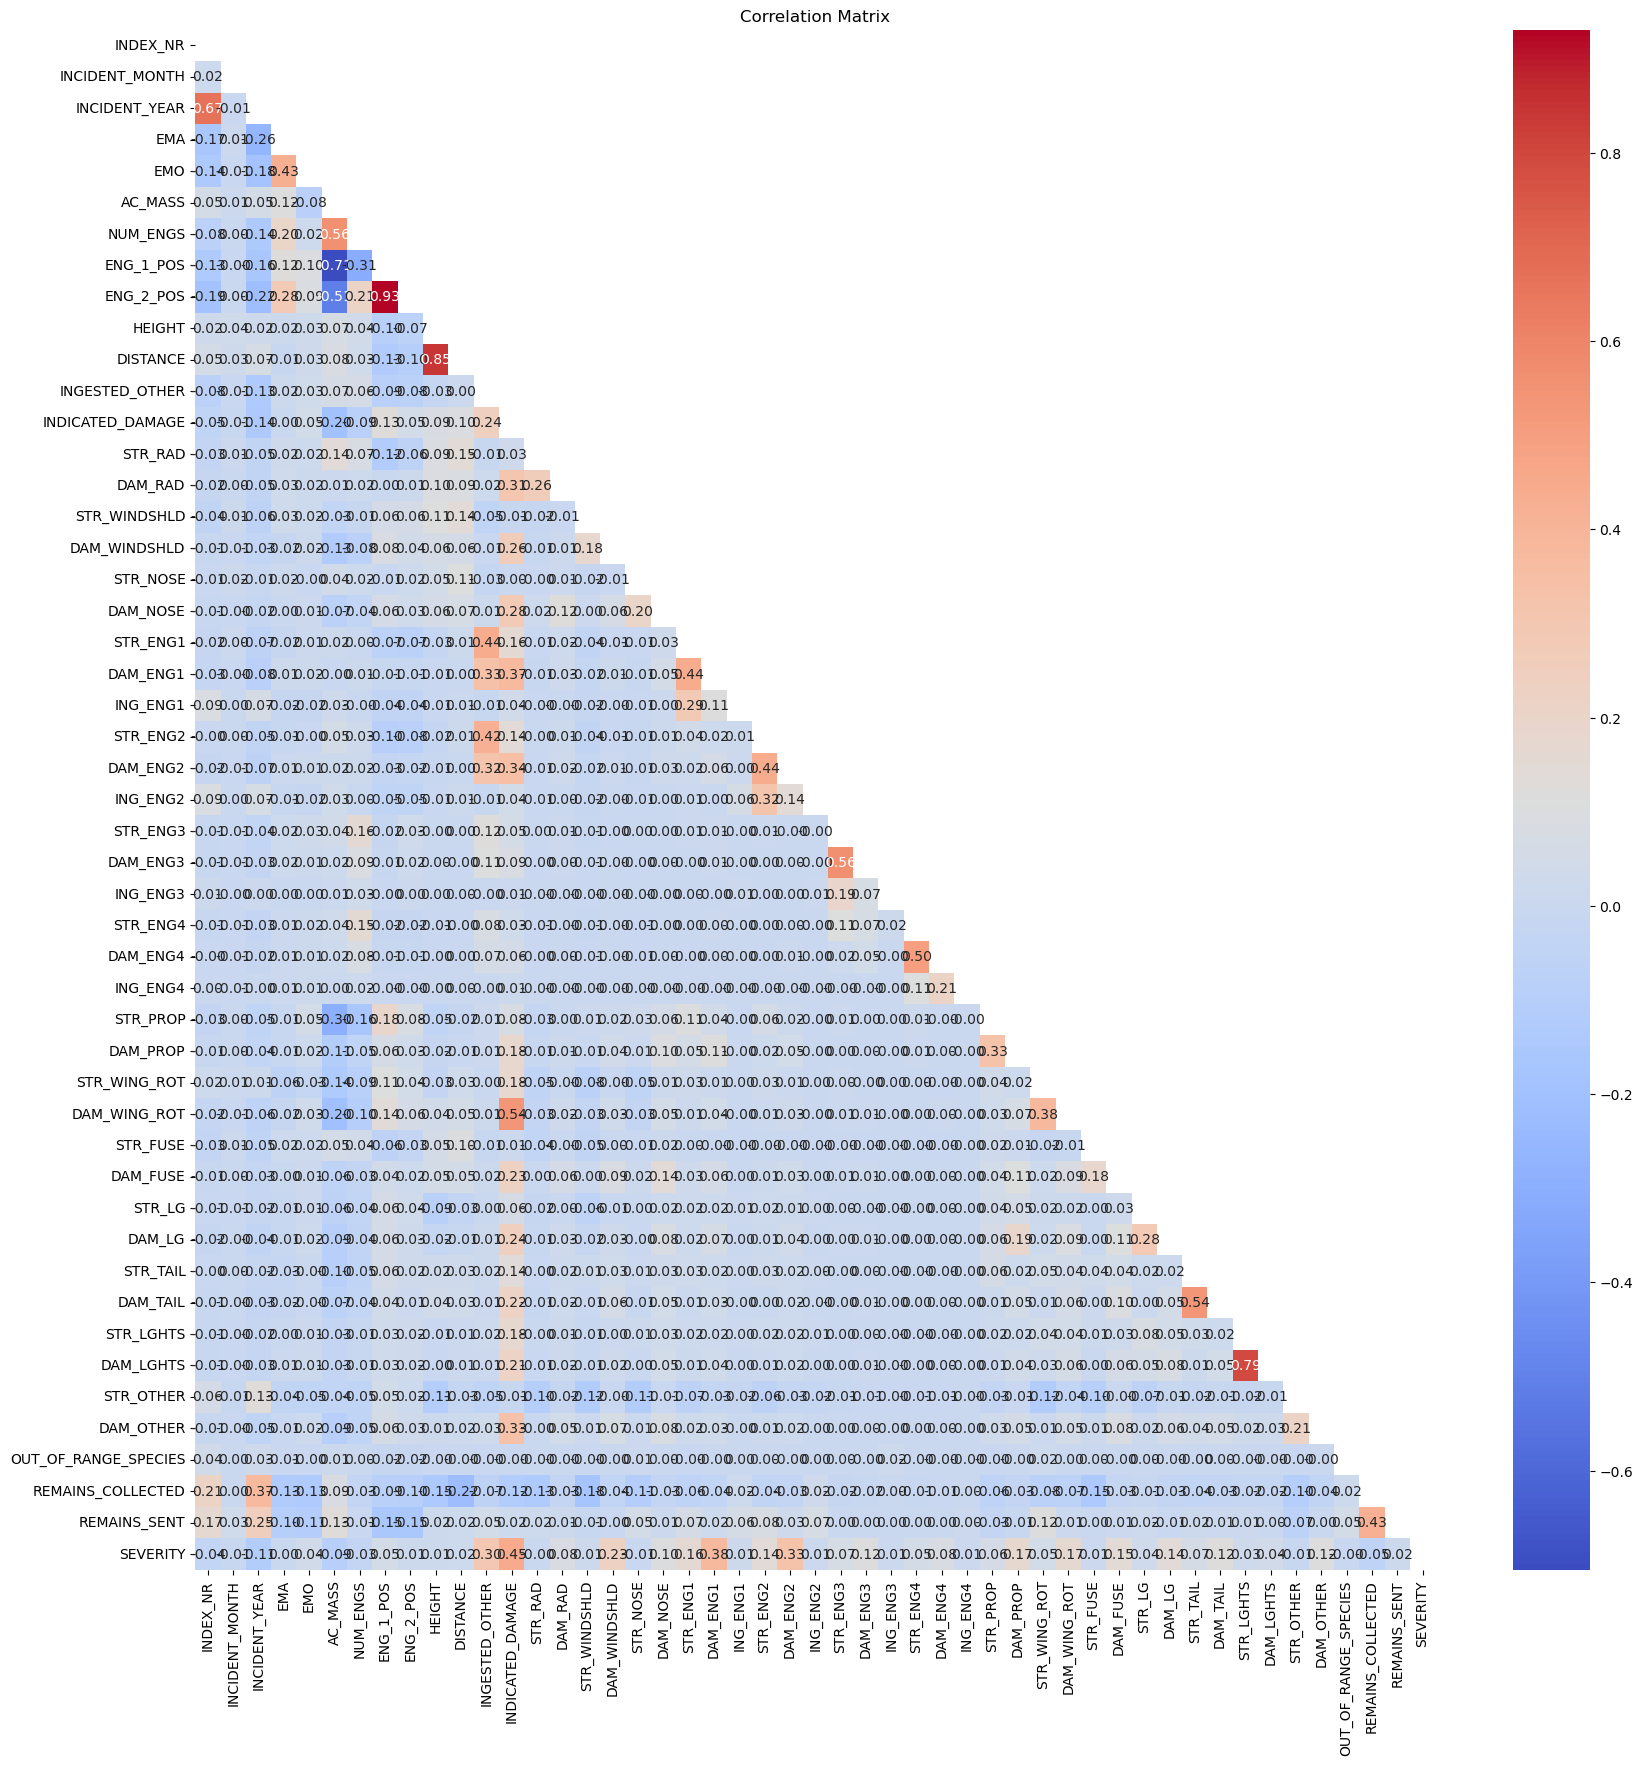

In [17]:
# correlation matrix of SEVERITY with other columns
corr = df_less_missing.corr()
# plot the correlation matrix, only show lower triangle, put the SEVERITY column at the first row
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', mask=np.triu(corr))
plt.title('Correlation Matrix')
plt.show()

In [18]:
# show the top cols that are correlated with SEVERITY
corr['SEVERITY'].sort_values(ascending=False).head(10), corr['SEVERITY'].sort_values(ascending=False).tail(10)


(SEVERITY            1.000000
 INDICATED_DAMAGE    0.449298
 DAM_ENG1            0.375572
 DAM_ENG2            0.326493
 INGESTED_OTHER      0.302483
 DAM_WINDSHLD        0.226169
 DAM_PROP            0.172767
 DAM_WING_ROT        0.167855
 STR_ENG1            0.162619
 DAM_FUSE            0.147995
 Name: SEVERITY, dtype: float64,
 STR_RAD                -0.002296
 OUT_OF_RANGE_SPECIES   -0.002686
 STR_NOSE               -0.007013
 INCIDENT_MONTH         -0.009983
 STR_OTHER              -0.014837
 NUM_ENGS               -0.030008
 INDEX_NR               -0.036663
 REMAINS_COLLECTED      -0.053509
 AC_MASS                -0.092671
 INCIDENT_YEAR          -0.112918
 Name: SEVERITY, dtype: float64)

In [19]:
# show missing of time columns
df_less_missing[['INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME_OF_DAY', 'TIME']].isnull().mean()*100


INCIDENT_DATE      0.000000
INCIDENT_MONTH     0.000000
INCIDENT_YEAR      0.000000
TIME_OF_DAY       43.770755
TIME              38.692126
dtype: float64

In [20]:
# change the INCIDENT_DATE to datetime format
df_less_missing['INCIDENT_DATE'] = pd.to_datetime(df_less_missing['INCIDENT_DATE'])


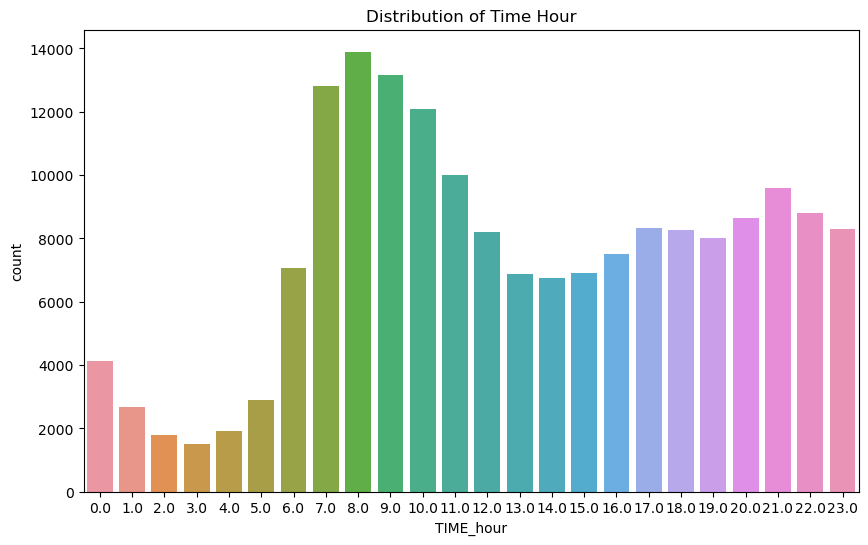

In [21]:
# extract the hour from the TIME column, the hour is the first two digits before the colon
df_less_missing['TIME_hour'] = df_less_missing['TIME'].str.extract(r'(\d{2})')
# convert to numeric
df_less_missing['TIME_hour'] = pd.to_numeric(df_less_missing['TIME_hour'], errors='coerce')
# plot the distribution of the TIME_hour
plt.figure(figsize=(10,6))
sns.countplot(x='TIME_hour', data=df_less_missing)
plt.title('Distribution of Time Hour')
plt.show()


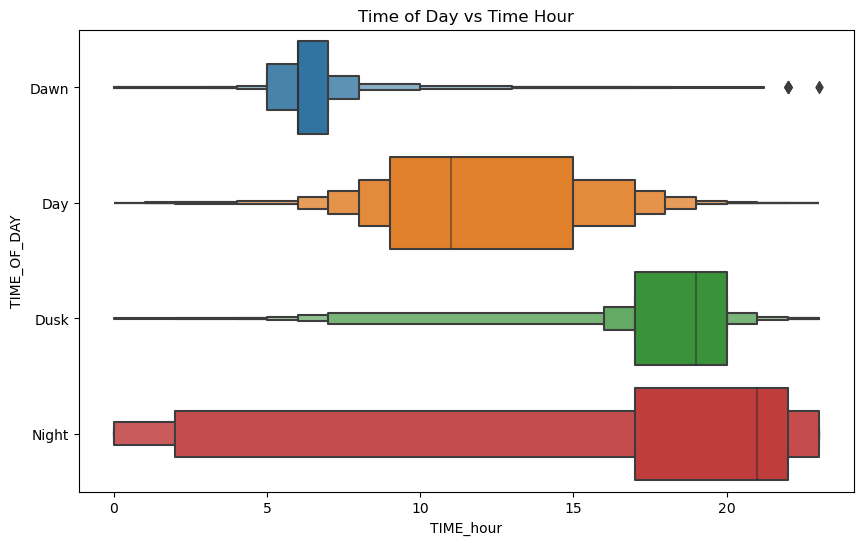

In [22]:
# plot the TIME_OF_DAY vs TIME_hour, to see the relationship
plt.figure(figsize=(10,6))
sns.boxenplot(y='TIME_OF_DAY', x='TIME_hour', 
              order=['Dawn', 'Day', 'Dusk', 'Night'],
              data=df_less_missing)
plt.title('Time of Day vs Time Hour')
plt.show()


In [23]:
# missing ratios for TIME_OF_DAY, TIME_hour
df_less_missing[['TIME_OF_DAY', 'TIME_hour']].isnull().sum(), df_less_missing[['TIME_OF_DAY']].isnull().sum()

(TIME_OF_DAY    138527
 TIME_hour      136450
 dtype: int64,
 TIME_OF_DAY    138527
 dtype: int64)

In [24]:
# fill the missing values of TIME_OF_DAY with the 'UNKNOWN'
df_less_missing['TIME_OF_DAY'].fillna('UNKNOWN', inplace=True)


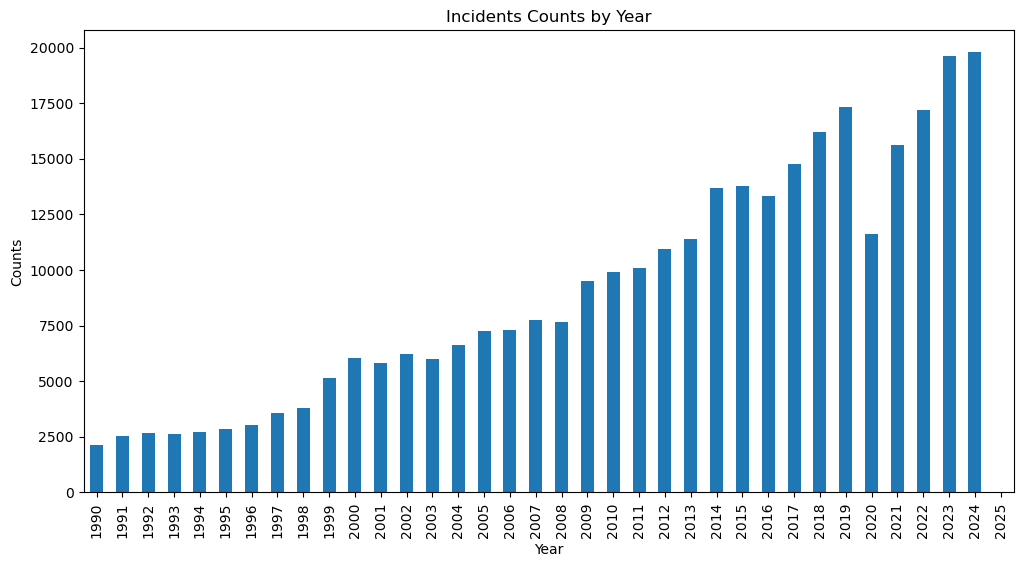

In [25]:
# plot the incidents counts by year, month
plt.figure(figsize=(12, 6))
df_less_missing['INCIDENT_YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title('Incidents Counts by Year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show()


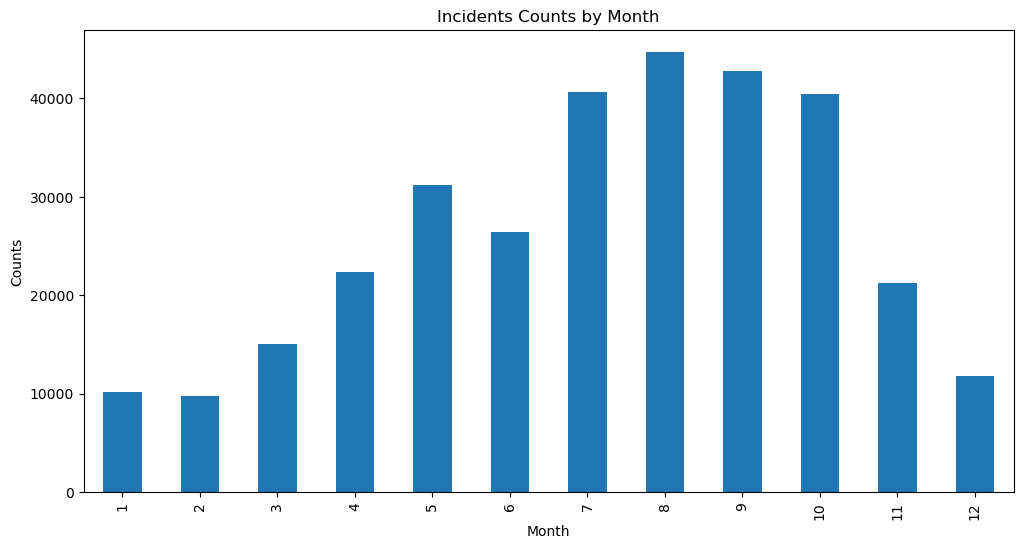

In [26]:
# plot the incidents counts by month
plt.figure(figsize=(12, 6))
df_less_missing['INCIDENT_MONTH'].value_counts().sort_index().plot(kind='bar')
plt.title('Incidents Counts by Month')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.show()


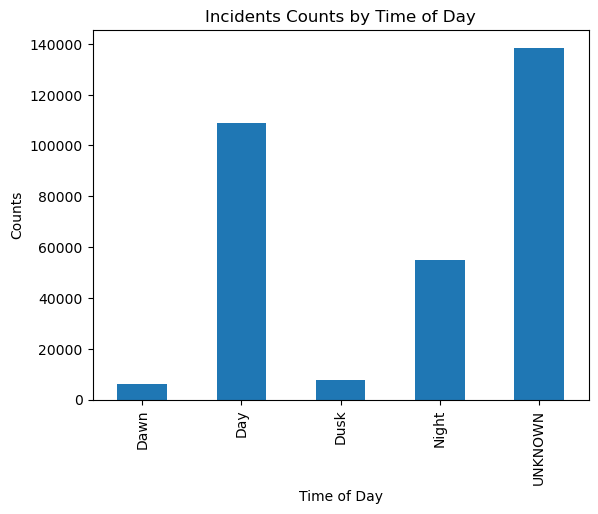

In [27]:
# plot the incidents counts by TIME_OF_DAY
df_less_missing['TIME_OF_DAY'].value_counts().sort_index().plot(kind='bar')
plt.title('Incidents Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Counts')
plt.show()



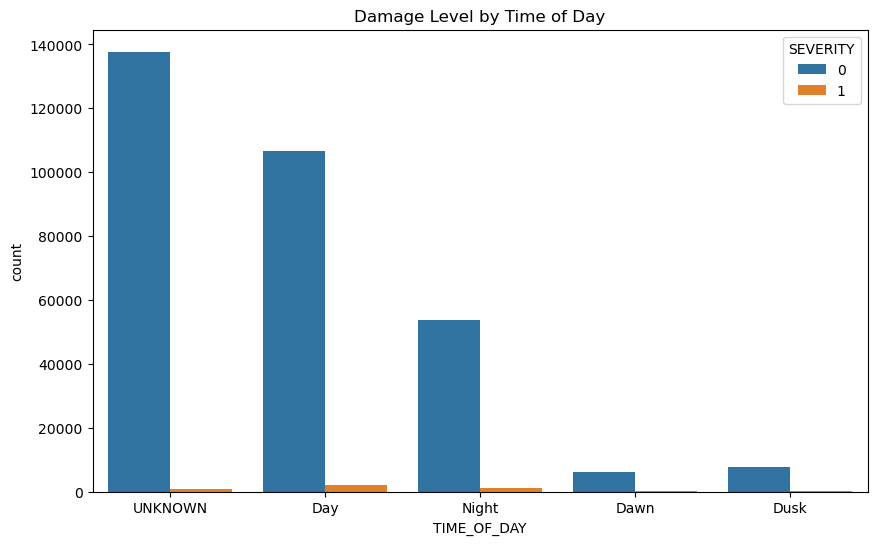

In [28]:
# how about the damage level for each TIME_OF_DAY
plt.figure(figsize=(10,6))
sns.countplot(x='TIME_OF_DAY', hue='SEVERITY', data=df_less_missing)
plt.title('Damage Level by Time of Day')
plt.show()

In [29]:
# Wildlife-specific Analysis:

# Which species are most commonly involved?

# Severity of strikes by species: damage levels, effect on flights (delays, cancellations).

In [30]:
# bird species cols
bird_species_cols = ['SPECIES_ID',
'SPECIES',
'SIZE'
]
# show the unique values of the bird species
df_less_missing[bird_species_cols].nunique()


SPECIES_ID    931
SPECIES       931
SIZE            3
dtype: int64

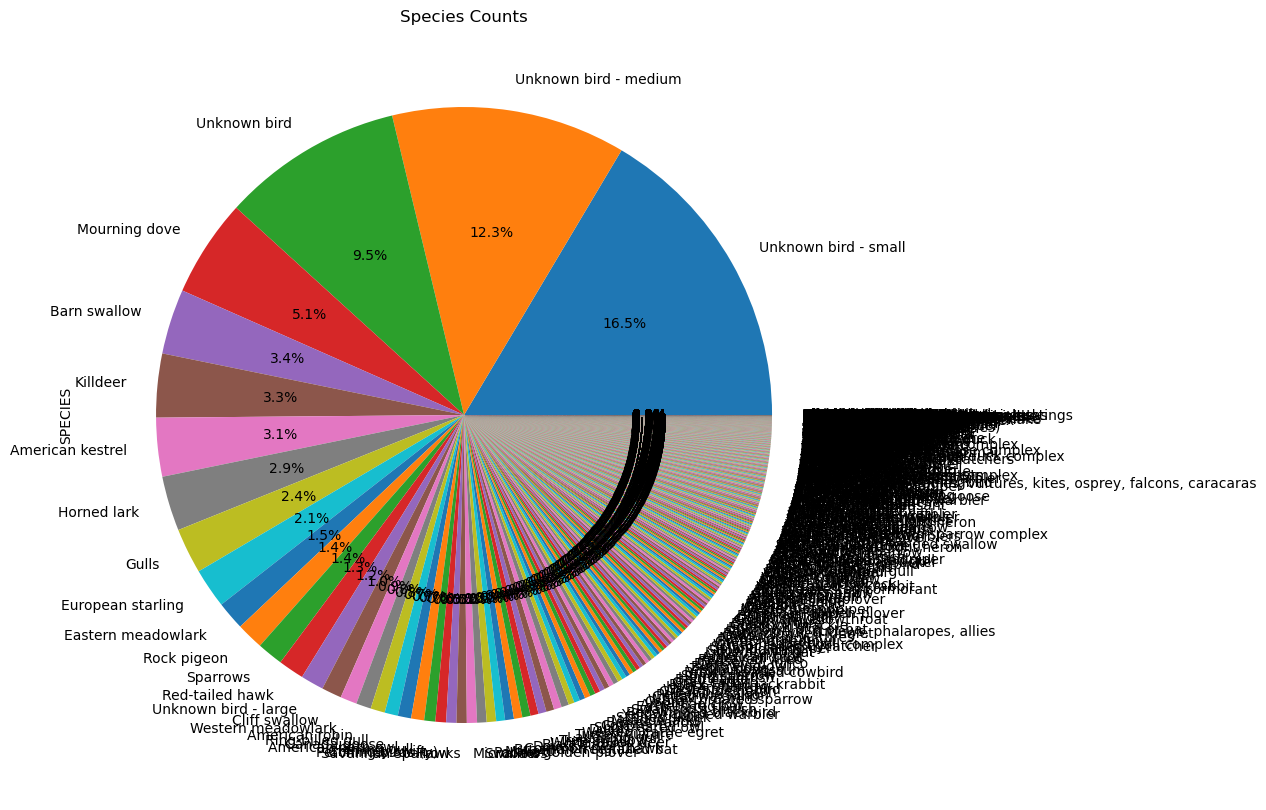

In [31]:
# counts of the bird species
species_counts = df_less_missing['SPECIES'].value_counts()
# pie chart of the species counts
plt.figure(figsize=(10,10))
species_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Species Counts')
plt.show()



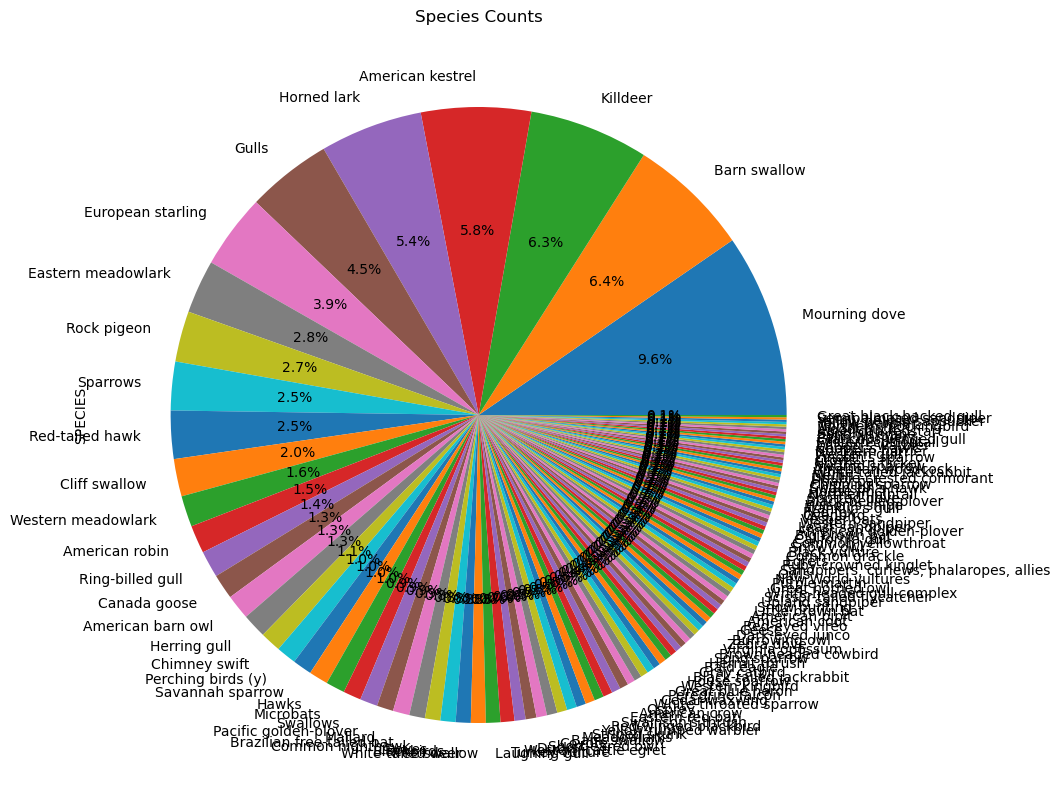

In [32]:
# exclude the species names that contains 'UNKNOWN'
species_counts = df_less_missing[df_less_missing['SPECIES'].str.contains('Unknown') == False]['SPECIES'].value_counts()
# exclude the species that counts less than 100
species_counts = species_counts[species_counts > 200]

# pie chart of the species counts
plt.figure(figsize=(10,10))
species_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Species Counts')
plt.show()


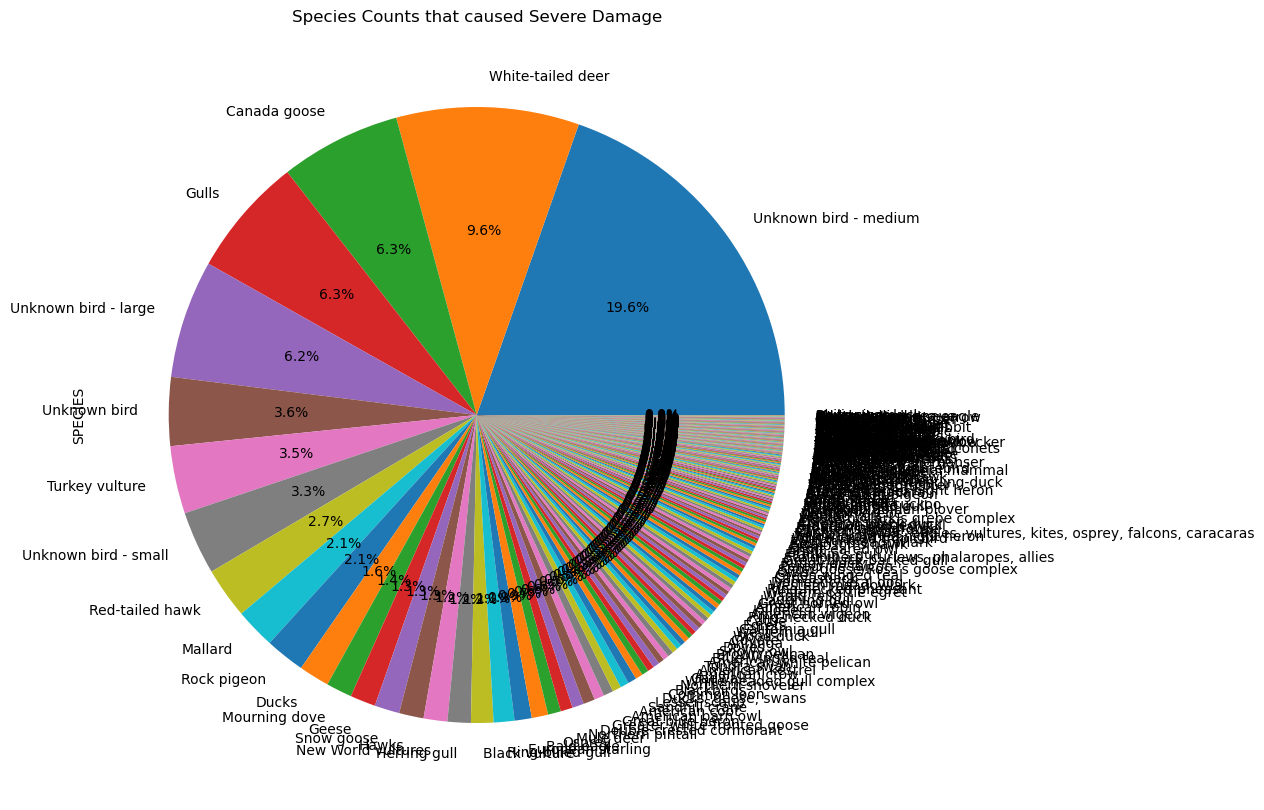

In [33]:
# plot the species counts that caused severe damage
species_severity_counts = df_less_missing[df_less_missing['SEVERITY'] == 1]['SPECIES'].value_counts()
# pie chart of the species counts
plt.figure(figsize=(10,10))
species_severity_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Species Counts that caused Severe Damage')
plt.show()


In [34]:
Geographical and Environmental Factors:

Correlation between geographic regions and wildlife strike incidents.

Airport surroundings: Proximity to water bodies, wildlife habitats, forests, urbanization, etc.



SyntaxError: invalid syntax (2481172134.py, line 1)

In [ ]:
geographic_cols = [ 'STATE', 'FAAREGION']


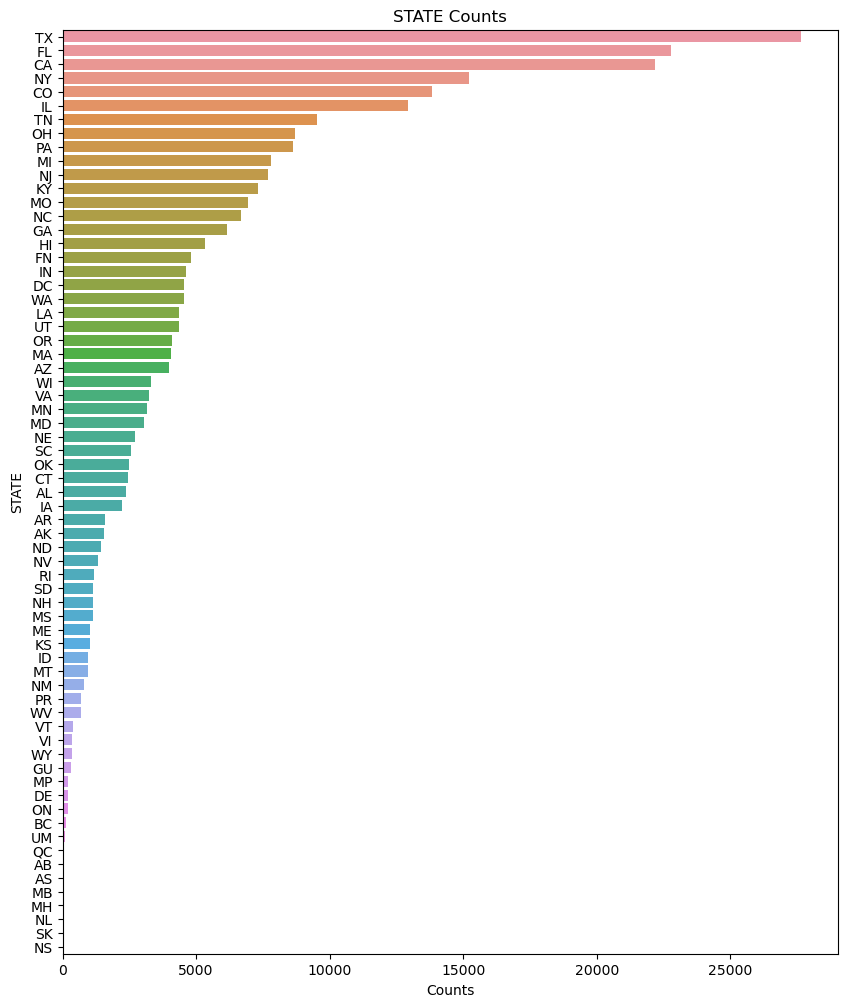

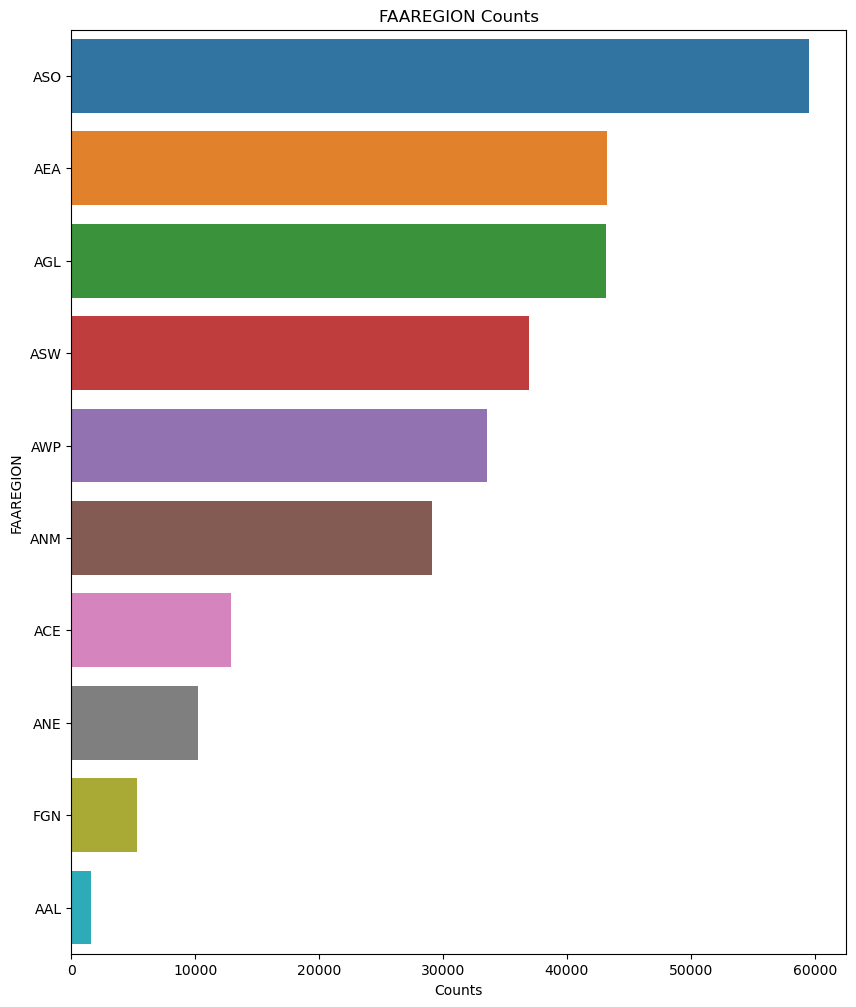

In [ ]:
# counts plot of the AIRPORT, STATE, FAAREGION, LOCATION, DISTANCE
for col in geographic_cols:
    plt.figure(figsize=(10, 12))
    sns.countplot(y=col, data=df_less_missing, order=df_less_missing[col].value_counts().index)
    plt.title(f'{col} Counts')
    plt.ylabel(col)
    plt.xlabel('Counts')
    plt.show()

In [ ]:
# year range of the data
df_less_missing['INCIDENT_YEAR'].min(), df_less_missing['INCIDENT_YEAR'].max()


(1990, 2025)

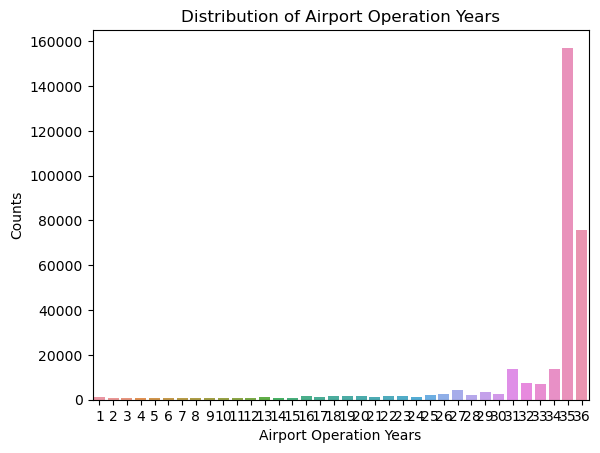

In [ ]:
# for each airport, calculated the unique values of INCIDENT_YEAR, to a new column, AIRPORT_OPERATION_YEARS
airport_operation_years = df_less_missing.groupby('AIRPORT')['INCIDENT_YEAR'].nunique()
# map the airport_operation_years to the AIRPORT
df_less_missing['AIRPORT_OPERATION_YEARS'] = df_less_missing['AIRPORT'].map(airport_operation_years)
# plot the distribution of the AIRPORT_OPERATION_YEARS
sns.countplot(x='AIRPORT_OPERATION_YEARS', data=df_less_missing)
plt.title('Distribution of Airport Operation Years')
plt.xlabel('Airport Operation Years')
plt.ylabel('Counts')
plt.show()


In [ ]:
# calculate the incidents counts for each airport, 
airport_incident_counts = df_less_missing.groupby('AIRPORT')['SEVERITY'].value_counts().unstack().fillna(0)
airport_incident_counts.columns = ['Not Severe', 'Severe']
# merged the airport_operation_years to the airport_incident_counts
airport_incident_counts = airport_incident_counts.join(airport_operation_years, on='AIRPORT')
# change to data frame
airport_incident_counts = airport_incident_counts.reset_index()
# map the AIRPORT_OPERATION_YEARS to airport_incident_counts
airport_incident_counts['AIRPORT_OPERATION_YEARS'] = airport_incident_counts['AIRPORT'].map(airport_operation_years)
# calculate the incidents per year
airport_incident_counts['Severe_INCIDENTS_PER_YEAR'] = airport_incident_counts['Severe'] / airport_incident_counts['AIRPORT_OPERATION_YEARS']
airport_incident_counts['Not_Severe_INCIDENTS_PER_YEAR'] = airport_incident_counts['Not Severe'] / airport_incident_counts['AIRPORT_OPERATION_YEARS']




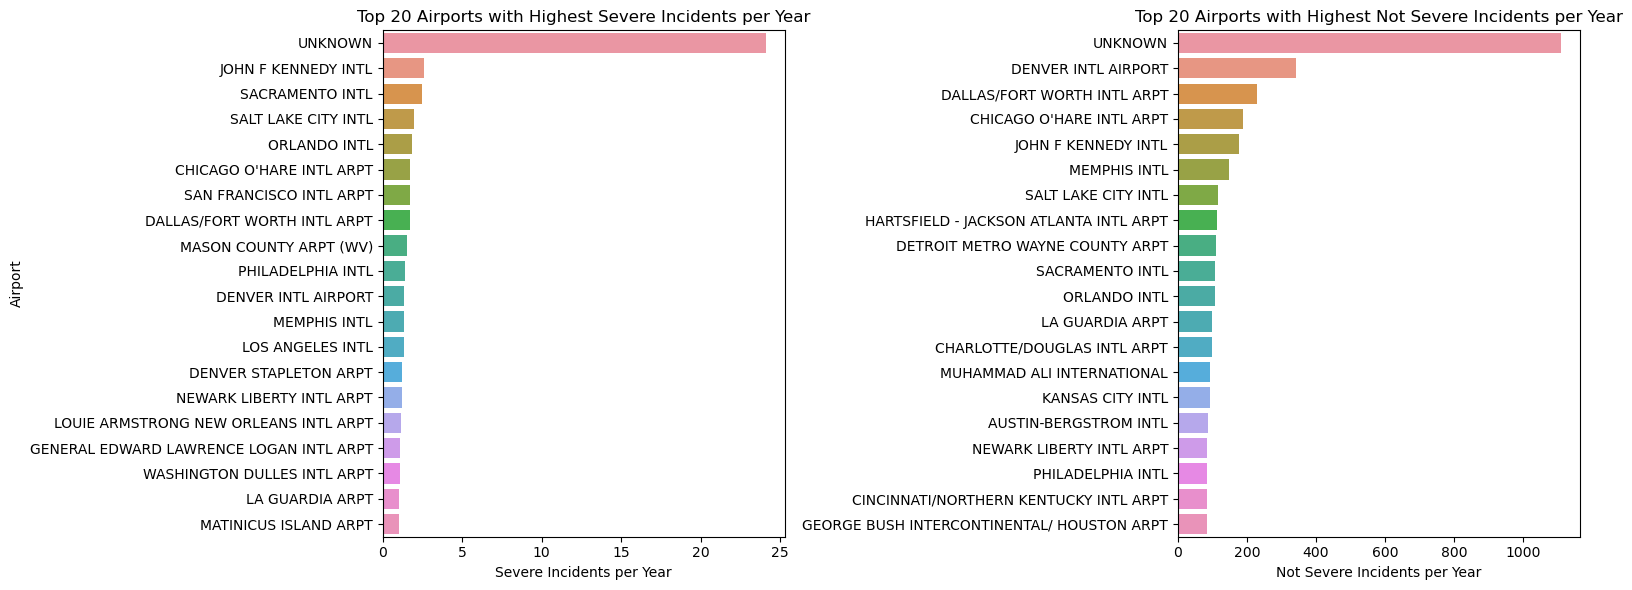

In [ ]:
# Create a (1, 2) subplot figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the top 20 airports with the highest severe incidents per year
top20_airports_severe = airport_incident_counts.sort_values(by='Severe_INCIDENTS_PER_YEAR', ascending=False).head(20)
sns.barplot(x='Severe_INCIDENTS_PER_YEAR', y='AIRPORT', data=top20_airports_severe, ax=axes[0])
axes[0].set_title('Top 20 Airports with Highest Severe Incidents per Year')
axes[0].set_xlabel('Severe Incidents per Year')
axes[0].set_ylabel('Airport')

# Plot the top 20 airports with the highest not severe incidents per year
top20_airports_not_severe = airport_incident_counts.sort_values(by='Not_Severe_INCIDENTS_PER_YEAR', ascending=False).head(20)
sns.barplot(x='Not_Severe_INCIDENTS_PER_YEAR', y='AIRPORT', data=top20_airports_not_severe, ax=axes[1])
axes[1].set_title('Top 20 Airports with Highest Not Severe Incidents per Year')
axes[1].set_xlabel('Not Severe Incidents per Year')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
Aircraft and Flight-related Analysis:

Aircraft type/model involved frequently.

Phases of flight most vulnerable to wildlife strikes (takeoff, landing, climb, approach).

realtive cols are ATYPE
AMA
AMO
EMA
EMO
AC_CLASS
AC_MASS
NUM_ENGS
TYPE_ENG
ENG_1_POS
ENG_2_POS
ENG_3_POS
ENG_4_POS

In [60]:
aircraft_cols = [ 'AMA', 'AMO', 'EMA', 'EMO', 'AC_CLASS', 'AC_MASS', 'NUM_ENGS', 'TYPE_ENG', 'ENG_1_POS', 'ENG_2_POS']

# show the unique values, misisng ratios of the aircraft_cols
df_less_missing[aircraft_cols].nunique(), df_less_missing[aircraft_cols].isnull().mean()


(AMA          94
 AMO          63
 EMA          36
 EMO          49
 AC_CLASS      5
 AC_MASS       6
 NUM_ENGS      4
 TYPE_ENG      7
 ENG_1_POS     7
 ENG_2_POS     7
 dtype: int64,
 AMA          0.290088
 AMO          0.371300
 EMA          0.335215
 EMO          0.362070
 AC_CLASS     0.285153
 AC_MASS      0.000000
 NUM_ENGS     0.286353
 TYPE_ENG     0.286666
 ENG_1_POS    0.286429
 ENG_2_POS    0.336236
 dtype: float64)

In [62]:
df_less_missing.head()

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,AIRPORT_LATITUDE,AIRPORT_LONGITUDE,RUNWAY,STATE,FAAREGION,OPID,OPERATOR,REG,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,PHASE_OF_FLIGHT,HEIGHT,DISTANCE,INGESTED_OTHER,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,SPECIES_ID,SPECIES,OUT_OF_RANGE_SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_STRUCK,SIZE,COMMENTS,SOURCE,PERSON,SEVERITY,TIME_hour
0,608242,1996-06-22,6,1996,NaN,UNKNOWN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,NaN,CA,AWP,UAL,UNITED AIRLINES,NaN,B-737-300,148,24,10.0,1.0,Airplane,4.0,D,2.0,1.0,1.0,Take-off Run,0.0,0.0,0,0,missing,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,UNKBM,Unknown bird - medium,0,BLOOD ON L FWD NOSE AREA SEEN BY CREW AFTER LDG.,0,0,Unknown,1,Medium,/Legacy Record=100001/,Air Transport Report,Air Transport Operations,0,NaN
1,608243,1996-06-26,6,1996,NaN,UNKNOWN,KDEN,DENVER INTL AIRPORT,39.85841,-104.667,NaN,CO,ANM,UAL,UNITED AIRLINES,NaN,B-737-300,148,24,10.0,1.0,Airplane,4.0,D,2.0,1.0,1.0,Take-off Run,0.0,0.0,0,0,missing,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,UNKBM,Unknown bird - medium,0,CREW SUSPECTED BIRDSTRIKE ON T/O. LOOKED LIKE ...,0,0,Unknown,1,Medium,/Legacy Record=100002/,Air Transport Report,Air Transport Operations,0,NaN
2,608244,1996-07-01,7,1996,NaN,UNKNOWN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,NaN,NE,ACE,UAL,UNITED AIRLINES,NaN,B-757-200,148,26,34.0,40.0,Airplane,4.0,D,2.0,1.0,1.0,Take-off Run,0.0,0.0,0,0,N,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,UNKBM,Unknown bird - medium,0,BIRDSTRIKE AT ROTATION. INSPN. NO DMG.,0,0,Unknown,1,Medium,/Legacy Record=100003/,Air Transport Report,Air Transport Operations,0,NaN
3,608245,1996-07-01,7,1996,NaN,UNKNOWN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,NaN,DC,AEA,UAL,UNITED AIRLINES,NaN,A-320,04A,3,23.0,1.0,Airplane,4.0,D,2.0,1.0,1.0,Approach,1000.0,NaN,0,0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,UNKBM,Unknown bird - medium,0,"ON FINAL APCH, STRIKE UNDER THE NOSE OF THE CO...",0,0,Unknown,1,Medium,/Legacy Record=100004/,Air Transport Report,Air Transport Operations,0,NaN
4,608246,1996-07-01,7,1996,NaN,UNKNOWN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,NaN,NY,AEA,UAL,UNITED AIRLINES,NaN,A-320,04A,3,23.0,1.0,Airplane,4.0,D,2.0,1.0,1.0,Climb,5000.0,NaN,1,1,M,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,UNKBM,Unknown bird - medium,0,LOUD NOISE WAS HEARD DURING CLIMBOUT THAT SOUN...,0,0,Unknown,1,Medium,/Legacy Record=100005/,Air Transport Report,Air Transport Operations,0,NaN


In [61]:
print(df_less_missing['AC_CLASS'].unique())
# Strip whitespace and normalize case
df_less_missing['AC_CLASS'] = df_less_missing['AC_CLASS'].str.strip().str.upper()
# # Change the AC_CLASS to the more readable format
ac_class_dict = {'A': 'Airplane', 'B': 'Helicopter', 'C': 'Glider', 'D': 'Balloon', 'J': 'Ultralight', 'Y': 'Other'}
# Map the AC_CLASS to the more readable format
df_less_missing['AC_CLASS'] = df_less_missing['AC_CLASS'].map(ac_class_dict)

['A' nan 'B' 'J' 'C' 'Y']


In [87]:
def calculate_severity_distribution(df, column, mapping_dict=None):
    """
    Calculate the severity distribution for a categorical feature.

    Parameters:
    - df: pandas DataFrame
    - column: str, the name of the categorical column
    - mapping_dict: dict, optional, a dictionary to map column values to more readable formats

    Returns:
    - pandas DataFrame with severity distribution
    """
    # fill the missing values with 'UNKNOWN'
    df[column].fillna('UNKNOWN', inplace=True)
    # change the columns to string type
    df[column] = df[column].astype(str)
    # Group by the column, calculate the incidents counts, and the severity counts, normalize the counts
    severity_counts = df.groupby(column)['SEVERITY'].value_counts(normalize=True).unstack().fillna(0) * 100
    # only keep two digits after the decimal point
    severity_counts = severity_counts.round(2)
    # Rename the columns
    severity_counts.columns = ['Not Severe %', 'Severe %']
    # Reset the index to convert the column into a DataFrame column
    severity_counts = severity_counts.reset_index()
    # plot the distribution of the severity
    sns.barplot(x='Severe %', y=column, data=severity_counts)
    plt.title(f'Severity Distribution by {column}')
    plt.xlabel('Severe %')
    plt.ylabel(column)
    plt.show()
    
    



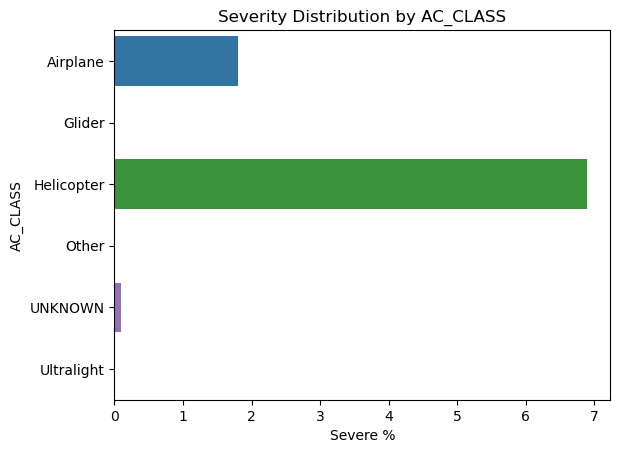

In [88]:
# apply to the AC_CLASS

calculate_severity_distribution(df_less_missing, 'AC_CLASS')

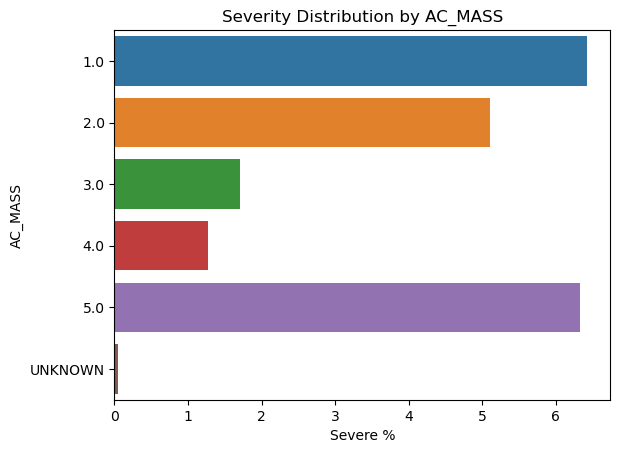

In [89]:
# apply to the AC_MASS
calculate_severity_distribution(df_less_missing, 'AC_MASS')


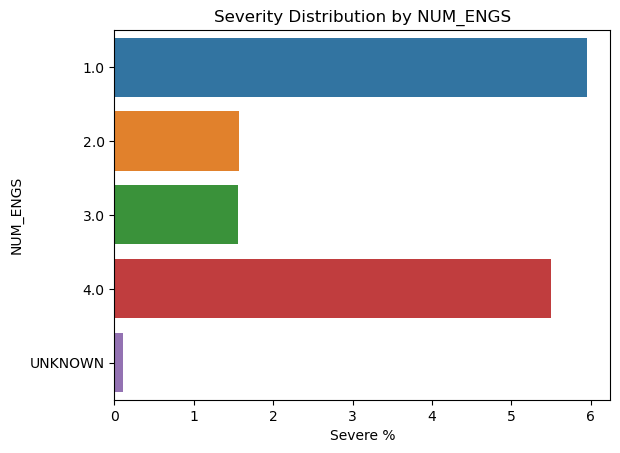

In [90]:
# apply to the NUM_ENGS
calculate_severity_distribution(df_less_missing, 'NUM_ENGS')


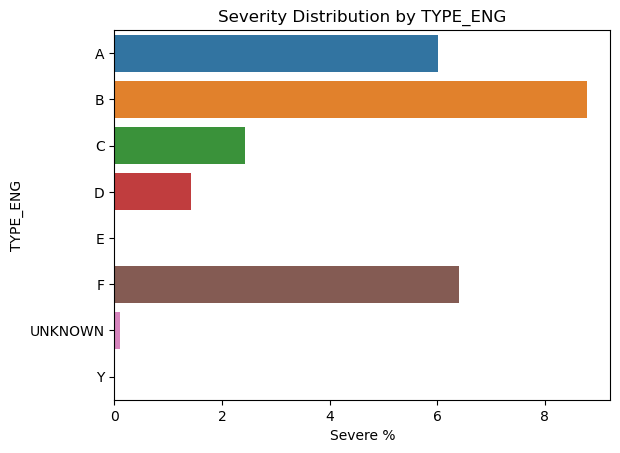

In [91]:
# apply to the TYPE_ENG
calculate_severity_distribution(df_less_missing, 'TYPE_ENG')


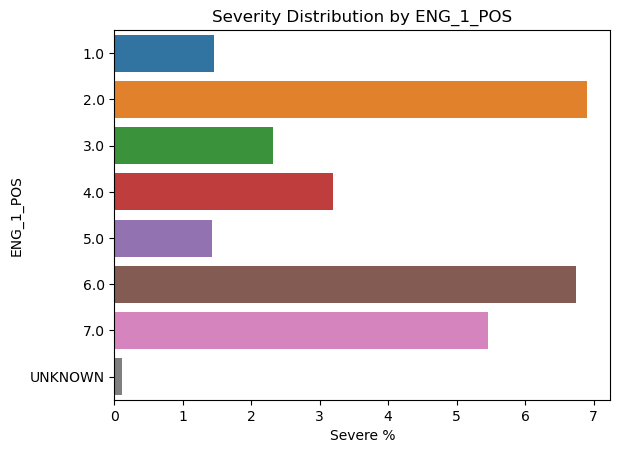

In [92]:
# apply to the ENG_1_POS
calculate_severity_distribution(df_less_missing, 'ENG_1_POS')

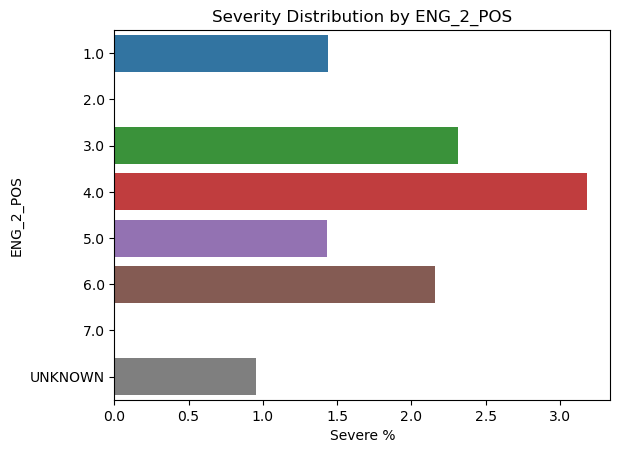

In [93]:
# apply to the ENG_2_POS
calculate_severity_distribution(df_less_missing, 'ENG_2_POS')

Geographical and Environmental Factors:

Correlation between geographic regions and wildlife strike incidents.

Airport surroundings: Proximity to water bodies, wildlife habitats, forests, urbanization, etc.

ENROUTE


HEIGHT
SPEED
DISTANCE
PHASE_OF_FLT

In [75]:
df_less_missing.columns

Index(['INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME',
       'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT', 'AIRPORT_LATITUDE',
       'AIRPORT_LONGITUDE', 'RUNWAY', 'STATE', 'FAAREGION', 'OPID', 'OPERATOR',
       'REG', 'AIRCRAFT', 'AMA', 'AMO', 'EMA', 'EMO', 'AC_CLASS', 'AC_MASS',
       'TYPE_ENG', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS', 'PHASE_OF_FLIGHT',
       'HEIGHT', 'DISTANCE', 'INGESTED_OTHER', 'INDICATED_DAMAGE',
       'DAMAGE_LEVEL', 'STR_RAD', 'DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD',
       'STR_NOSE', 'DAM_NOSE', 'STR_ENG1', 'DAM_ENG1', 'ING_ENG1', 'STR_ENG2',
       'DAM_ENG2', 'ING_ENG2', 'STR_ENG3', 'DAM_ENG3', 'ING_ENG3', 'STR_ENG4',
       'DAM_ENG4', 'ING_ENG4', 'STR_PROP', 'DAM_PROP', 'STR_WING_ROT',
       'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG', 'STR_TAIL',
       'DAM_TAIL', 'STR_LGHTS', 'DAM_LGHTS', 'STR_OTHER', 'DAM_OTHER',
       'SPECIES_ID', 'SPECIES', 'OUT_OF_RANGE_SPECIES', 'REMARKS',
       'REMAINS_COLLECTED', 'RE

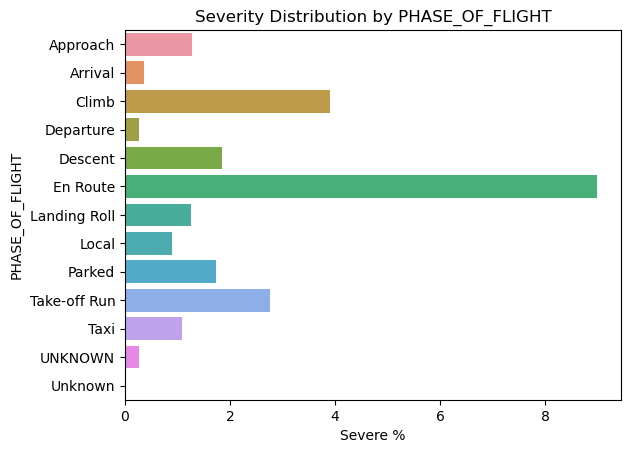

In [94]:
# apply to the ENROUTE and FLIGHT_PHASE
calculate_severity_distribution(df_less_missing, 'PHASE_OF_FLIGHT')

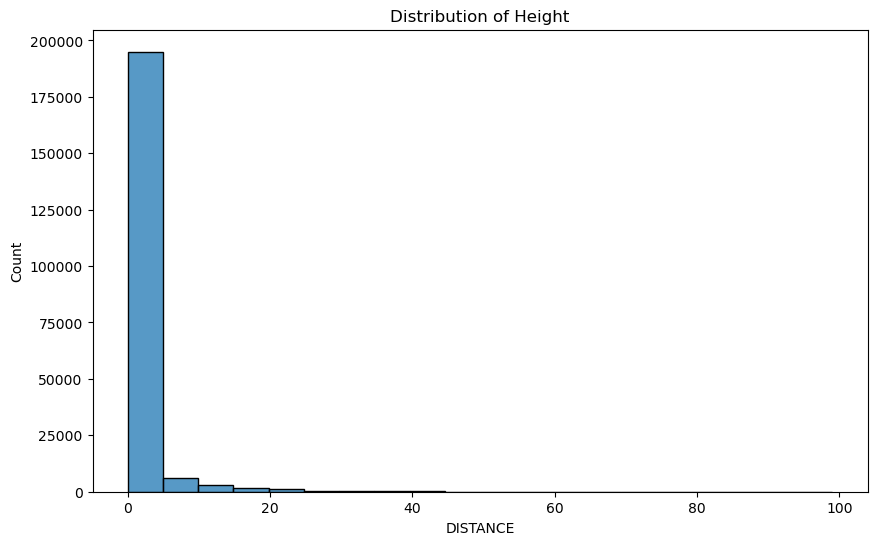

In [100]:
# plot the distribution of the 'HEIGHT', 'DISTANCE'
plt.figure(figsize=(10,6))
sns.histplot(df_less_missing['DISTANCE'], bins=20)
plt.title('Distribution of Height')
plt.show()


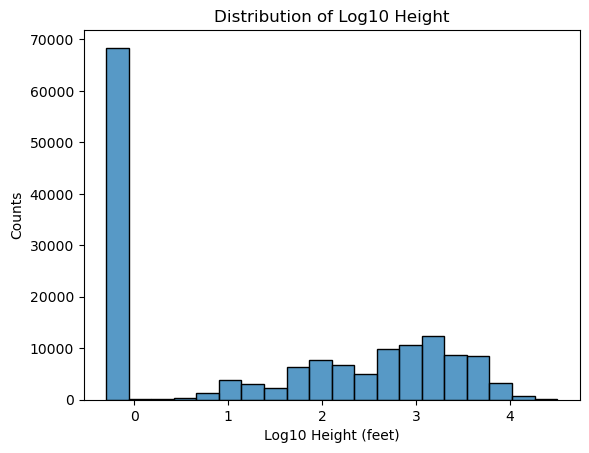

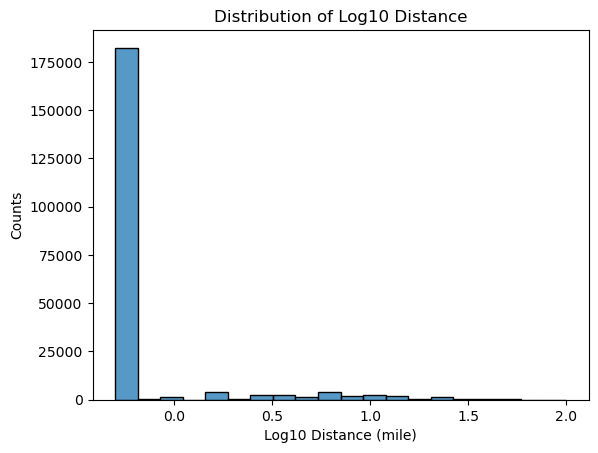

In [107]:
# Analysis of the SEVERITY by the numeric columns 'HEIGHT', 'DISTANCE'
numeric_cols = ['HEIGHT', 'DISTANCE']
# Log10 transform the numeric columns
for col in numeric_cols:
    df_less_missing[f'log10_{col}'] = np.log10(df_less_missing[col] + 0.5)
# plot the distribution of the log10 transformed column, 'log10_HEIGHT',  unit is feet
sns.histplot(df_less_missing['log10_HEIGHT'], bins=20)
plt.title('Distribution of Log10 Height')
plt.ylabel('Counts')
plt.xlabel('Log10 Height (feet)')
plt.show()
# plot the distribution of the log10 transformed column, 'log10_DISTANCE', unit is mile
sns.histplot(df_less_missing['log10_DISTANCE'], bins=20)
plt.title('Distribution of Log10 Distance')
plt.ylabel('Counts')
plt.xlabel('Log10 Distance (mile)')
plt.show()
